<a href="https://www.kaggle.com/code/ebruiserisobay/scoutium-talent-scouting-classification-w-ml?scriptVersionId=188880191" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

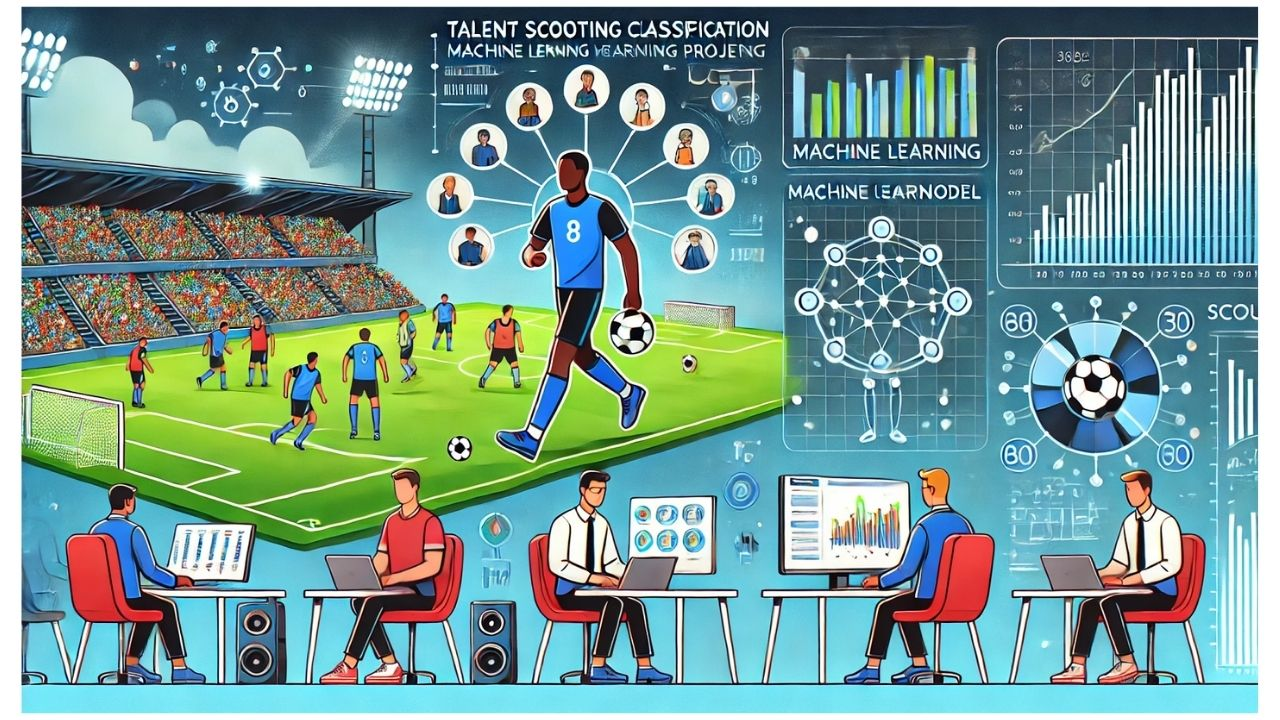

 # Scoutium - Talent Scouting Classification
 
 # Introduction
<font color='#77dd77' style='font-weight:bold;'>


**1.** [Business Problem](#1)
    
**2.** [About Dataset](#2)
    
**3.** [Data Loading & Checking](#3)
    
**4.** [Exploratory Data Analysis (EDA)](#4)
   
* **4.1** [Analysis of Categorical Variables](#5)
* **4.2** [Analysis of Numerical Variables](#6)
* **4.3** [Target Variable Analysis](#7)
* **4.4** [Outlier Analysis](#8)
* **4.5** [Correlation Analysis](#9)
    
**5.** [Data Preprocessing](#10)
    
* **5.1** [Missing Values ](#11)
* **5.2** [Outlier Supression](#12)
        
**6.** [Feature Engineering](#13)
    
* **6.1** [Feature Extraction](#14)
* **6.2** [Feature Scaling](#15)
    
**7.** [Model](#16)
    
* **7.1** [Modeling](#17)
* **7.2** [Model Performance Evaluation](#18)
* **7.3** [Cross Validation](#19)

**8.** [Hyperparameter Tuning](#20)
    
* **8.1** [Determining Parameters](#21)
* **8.2** [Best Parameters & Best Scores](#22)   
    
**9.** [Final Model](#23)   
* **9.1** [Modeling](#24)
* **9.2** [Cross Validation](#25)
* **9.3** [Feature Importance](#26)
* **9.4** [Prediction](#27)

<a id = "1"></a><br>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>1. Business Problem</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

Predicting the class (average, highlighted) of players based on the ratings given to their characteristics by scouts.

<a id = "2"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>2. About Dataset</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

The dataset consists of evaluations made by scouts on players observed during matches. It includes information on the rated characteristics and scores of the players evaluated by the scouts.

**scoutium_attributes.csv:** 

* 8 Variables
* 10,730 Observations

**Variables:**

* **task_response_id:** A set of evaluations for all players in a team by a scout during a match.
* **match_id:** ID of the respective match.
* **evaluator_id:** ID of the evaluator (scout).
* **player_id:** ID of the respective player.
* **position_id:** ID of the position played by the player in that match (1: Goalkeeper, 2: Center-back, 3: Right-back, 4: Left-back, 5: Defensive Midfielder, 6: Central Midfielder, 7: Right Winger, 8: Left Winger, 9: Attacking Midfielder, 10: Forward).
* **analysis_id:** A set of characteristic evaluations of a player by a scout during a match.
* **attribute_id:** ID of each characteristic evaluated for the players.
* **attribute_value:** The score given by a scout to a player’s characteristic.

**scoutium_potential_labels.csv:**

* 5 Variables
* 322 Observations

**Variables:**

* **task_response_id:** A set of evaluations for all players in a team by a scout during a match.
* **match_id:** ID of the respective match.
* **evaluator_id:** ID of the evaluator (scout).
* **player_id:** ID of the respective player.
* **potential_label:** The final decision label of a scout on a player during a match (target variable).

<a id = "3"></a><br>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>3. Data Loading & Checking</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [1]:
!pip install missingno as msno
!pip install pydotplus
!pip install astor
!pip install joblib
!pip install skompiler

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score,mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,cross_validate
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, StandardScaler,LabelEncoder,RobustScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import joblib 
import pydotplus
from skompiler import skompile
import datetime as dt

from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter(action="ignore")
from sklearn.exceptions import ConvergenceWarning

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option("display.width", 500)

ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.7/278.7 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24552 sha256=0b109f93561569ef961e63e8b9ce464020178e4f3ef10e69d244f5176dec36c6
  Stored in directory: /root/.cache/pip/wheels/69/b2/67/08f0eef649af92df772c09f451558298e07fab1bc7cdf33db0
Successfully built pydotplus
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54311 sha256=574a3eadbe480e460187f80f04dba6f84b593af05348735a8af71a48ac21fdd1
  Stored in directory: /root/.cache/pip/wheels/c0/22/3d/bd8fd4c6cd205cf122a0974be908681472a6f44abd6b880614
Successfully built skompiler


In [2]:
#upload the dataset:

scoutium_attributes = pd.read_csv('/kaggle/input/scoutium-dataset/scoutium_attributes.csv',sep=';') 
scoutium_potential_labels = pd.read_csv('/kaggle/input/scoutium-dataset/scoutium_potential_labels.csv',sep=';')

In [3]:
scoutium_attributes.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value
0,4915,62935,177676,1361061,2,12818495,4322,56.000
1,4915,62935,177676,1361061,2,12818495,4323,56.000
2,4915,62935,177676,1361061,2,12818495,4324,67.000
3,4915,62935,177676,1361061,2,12818495,4325,56.000
4,4915,62935,177676,1361061,2,12818495,4326,45.000


In [4]:
scoutium_potential_labels.head()

,task_response_id,match_id,evaluator_id,player_id,potential_label
0,4915,62935,177676,1361061,average
1,4915,62935,177676,1361626,highlighted
2,4915,62935,177676,1361858,average
3,4915,62935,177676,1362220,highlighted
4,4915,62935,177676,1364951,highlighted


In [5]:
df_ = pd.merge(scoutium_attributes, scoutium_potential_labels, on=["task_response_id", 'match_id', 'evaluator_id', "player_id"])

In [6]:
# defining a function to upload the dataset

def load(dataframe): 
    df = dataframe.copy()
    return df

In [7]:
df = load(df_) # copy of the dataset
df.head()  # display first 5 rows

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,average
1,4915,62935,177676,1361061,2,12818495,4323,56.000,average
2,4915,62935,177676,1361061,2,12818495,4324,67.000,average
3,4915,62935,177676,1361061,2,12818495,4325,56.000,average
4,4915,62935,177676,1361061,2,12818495,4326,45.000,average


<a id = "4"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>4. Exploratory Data Analysis</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [8]:
# defining function to check all: 

def check_df(dataframe,head = 5):
    print("##################### SHAPE ####################")
    print(dataframe.shape)
    print("#################### COLUMNS ###################")
    print(dataframe.columns)
    print("#################### INDEX ###################")
    print(dataframe.index)
    print("#################### TYPES ##################")
    print(dataframe.dtypes)
    print("#################### NA ANY ###################")
    print(dataframe.isnull().values.any())
    print(f"#################### NA SUM - RATIO ####################")
    print(pd.DataFrame({"na_sum": dataframe.isnull().sum(),
                        "ratio": dataframe.isnull().sum() / dataframe.shape[0]}))
    print("#################### QUANTILES ###############")
    print(dataframe.describe().T)

check_df(df)

##################### SHAPE ####################
(10730, 9)
#################### COLUMNS ###################
Index(['task_response_id', 'match_id', 'evaluator_id', 'player_id', 'position_id', 'analysis_id', 'attribute_id', 'attribute_value', 'potential_label'], dtype='object')
#################### INDEX ###################
RangeIndex(start=0, stop=10730, step=1)
#################### TYPES ##################
task_response_id      int64
match_id              int64
evaluator_id          int64
player_id             int64
position_id           int64
analysis_id           int64
attribute_id          int64
attribute_value     float64
potential_label      object
dtype: object
#################### NA ANY ###################
False
#################### NA SUM - RATIO ####################
                  na_sum  ratio
task_response_id       0  0.000
match_id               0  0.000
evaluator_id           0  0.000
player_id              0  0.000
position_id            0  0.000
analysis_id         

In [9]:
# Capturing numeric and categorical variables:

def grab_col_names(dataframe, cat_th = 10, car_th = 20):
    # cat_cols, cat_but_car:
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # num_cols:
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    return cat_cols, num_cols , cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [10]:
print(f"Categoric columns:{len(cat_cols)}") # categorical columns
print(f"Numeric columns:{len(num_cols)}") # numeric columns
print(f"Cardinal columns:{len(cat_but_car)}") # categorical type but cardinal columns
print(f"Checking: total columns(cat_num_car):{len(cat_cols + num_cols + cat_but_car)} , dataset total columns:{len(df.columns)}")

Categoric columns:1
Numeric columns:8
Cardinal columns:0
Checking: total columns(cat_num_car):9 , dataset total columns:9


In [11]:
cat_but_car # categorical type but cardinal columns

[]

In [12]:
num_cols

['task_response_id',
 'match_id',
 'evaluator_id',
 'player_id',
 'position_id',
 'analysis_id',
 'attribute_id',
 'attribute_value']

In [13]:
cat_cols

['potential_label']

> **Editing column types which we need:**

In [14]:
# defining a function to update cat_cols & num_cols by cat_but_car:

def col_types_updating_with_id_columns(dataframe,id_cols,car_but_cat_cols = [],cat_but_num_wrong = [],date_columns =[]):
    # updating num_cols,cat_cols:
    cat_cols, num_cols, cat_but_car = grab_col_names(dataframe)
    for col in id_cols:    
        if len(id_cols) > 0:
            if col in cat_cols:
                cat_cols.remove(col)
            if col in num_cols:
                num_cols.remove(col)
        else:continue
    for col in cat_but_car:    
        if len(cat_but_car) > 0:
            num_cols.append(col)
            cat_cols.append(col)
            num_cols = [n_col for n_col in num_cols if (n_col not in id_cols) & (n_col not in car_but_cat_cols)]
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols) & (c_col not in num_cols)]
        else:continue
    for col in cat_but_num_wrong:    
        if len(cat_but_num_wrong) > 0:
            cat_cols.append(col)
            num_cols.remove(col)
            cat_cols = [c_col for c_col in cat_cols if (c_col not in id_cols)]
        else:continue 
    for col in date_columns:    
        if len(date_columns) > 0:
            if col in cat_cols:
                cat_cols.remove(col)
            if col in num_cols:
                num_cols.remove(col)
            date_cols = [d_col for d_col in date_columns if (d_col not in id_cols)]
        else:continue  
    return num_cols,cat_cols

In [15]:
#id lists:

ids = ['player_id',"match_id","evaluator_id"]

In [16]:
# changing the categoric columns but in num_cols:

cat_but_num_wrong = ["position_id","attribute_id"] 

In [17]:
# applying the function:

num_cols,cat_cols = col_types_updating_with_id_columns(dataframe = df,id_cols = ids,cat_but_num_wrong = cat_but_num_wrong)

In [18]:
cat_but_car

[]

In [19]:
cat_cols

['potential_label', 'position_id', 'attribute_id']

In [20]:
num_cols

['task_response_id', 'analysis_id', 'attribute_value']

In [21]:
#defining a function to change dtypes:

def update_not_correct_dtype(dataframe,num_cols,cat_cols):
    not_correct_dtype_n = [col for col in num_cols if dataframe[col].dtypes not in ["float64","int64","int32","datetime64[ns]"]]
    not_correct_dtype_c = [col for col in cat_cols if dataframe[col].dtypes not in ["O","category","datetime64[ns]"]]
    if len(not_correct_dtype_n) > 0:
        for col in not_correct_dtype_n:
            dataframe[col] = dataframe[col].astype("float64")
    if len(not_correct_dtype_c) > 0:    
        for col in not_correct_dtype_c:
            dataframe[col] = dataframe[col].astype("O")
    return not_correct_dtype_n,not_correct_dtype_c

In [22]:
# applying the function:
update_not_correct_dtype(df,num_cols,cat_cols)

([], ['position_id', 'attribute_id'])

In [23]:
#checking:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10730 entries, 0 to 10729
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   task_response_id  10730 non-null  int64  
 1   match_id          10730 non-null  int64  
 2   evaluator_id      10730 non-null  int64  
 3   player_id         10730 non-null  int64  
 4   position_id       10730 non-null  object 
 5   analysis_id       10730 non-null  int64  
 6   attribute_id      10730 non-null  object 
 7   attribute_value   10730 non-null  float64
 8   potential_label   10730 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 754.6+ KB


<a id = "5"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 4.1 Analysis of Categorical Variables</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [24]:
# defining a function to check summary of the categorical variables:

def cat_summary(dataframe,col_name,plot = False):
    print(f"#################### {col_name} Counts - Ratio ####################")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print(f"#################### {col_name} Unique Variable Counts ####################")
    print(f"{col_name} : {dataframe[col_name].nunique()}")
    if plot:
        print(f"#################### {col_name} Counts - Ratio Visualizing ####################")
    if plot:
        sns.countplot(x = dataframe[col_name], data = dataframe)
        plt.show(block = True)

#################### potential_label Counts - Ratio ####################
                 potential_label  Ratio
potential_label                        
average                     8497 79.189
highlighted                 2097 19.543
below_average                136  1.267
#################### potential_label Unique Variable Counts ####################
potential_label : 3
#################### potential_label Counts - Ratio Visualizing ####################


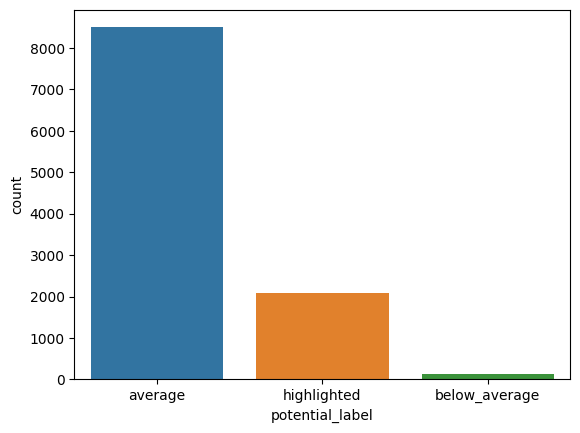

#################### position_id Counts - Ratio ####################
             position_id  Ratio
position_id                    
2                   1972 18.378
6                   1428 13.308
10                  1088 10.140
8                   1020  9.506
7                    986  9.189
3                    986  9.189
4                    884  8.239
9                    850  7.922
5                    816  7.605
1                    700  6.524
#################### position_id Unique Variable Counts ####################
position_id : 10
#################### position_id Counts - Ratio Visualizing ####################


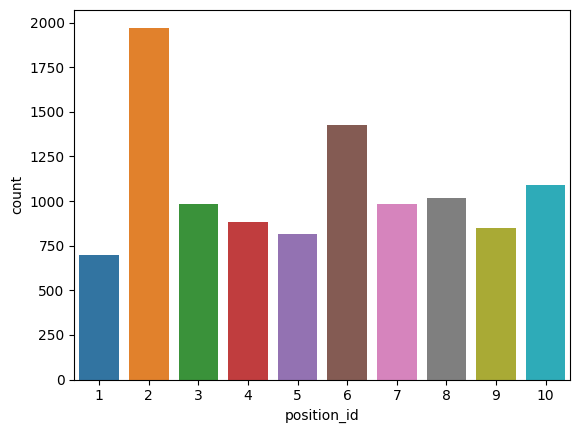

#################### attribute_id Counts - Ratio ####################
              attribute_id  Ratio
attribute_id                     
4322                   323  3.010
4426                   323  3.010
4353                   323  3.010
4354                   323  3.010
4323                   323  3.010
4355                   323  3.010
4342                   323  3.010
4357                   323  3.010
4338                   323  3.010
4352                   323  3.010
4423                   323  3.010
4332                   323  3.010
4330                   323  3.010
4329                   323  3.010
4328                   323  3.010
4327                   323  3.010
4326                   323  3.010
4325                   323  3.010
4324                   323  3.010
4350                   323  3.010
4408                   295  2.749
4407                   295  2.749
4356                   295  2.749
4345                   295  2.749
4351                   295  2.749
4349        

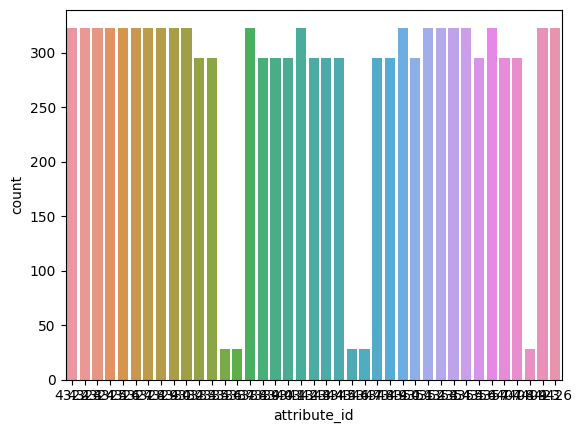

In [25]:
# applying the function:
for col in cat_cols:
    cat_summary(df,col,plot=True)

<a id = "6"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 4.2 Analysis of Numerical Variables</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [26]:
# defining a function to check summary of the numerical variables:

def num_summary(dataframe,col_name,plot = False, quantiles = [0.05, 0.10, 0.20, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]):
    if plot:
        dataframe[col_name].hist(bins=20)
        plt.xlabel(col_name)
        plt.title(col_name)
        plt.show(block = True)
    print("#################### QUANTILES ###############")
    print(dataframe[col_name].describe(quantiles).T, end= "\n\n")

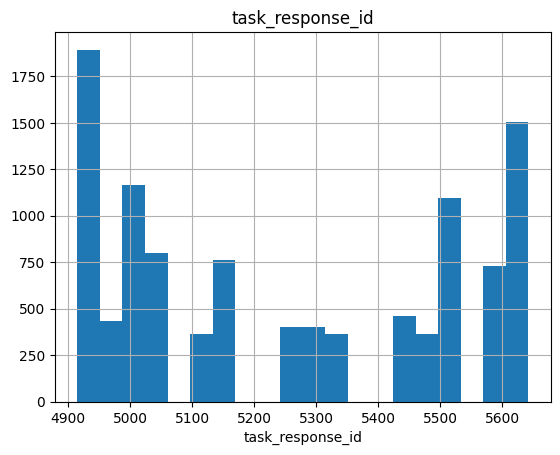

#################### QUANTILES ###############
count   10730.000
mean     5252.082
std       268.254
min      4915.000
5%       4919.000
10%      4929.000
20%      4970.000
50%      5162.000
60%      5319.000
80%      5579.000
90%      5621.000
95%      5639.000
99%      5642.000
max      5642.000
Name: task_response_id, dtype: float64



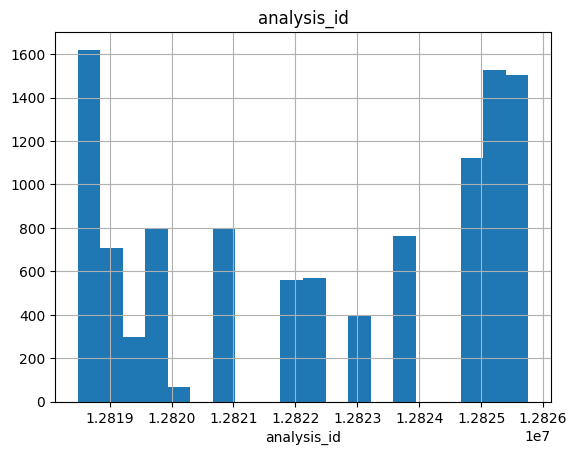

#################### QUANTILES ###############
count      10730.000
mean    12822388.800
std         2676.866
min     12818481.000
5%      12818552.000
10%     12818771.000
20%     12819199.000
50%     12822231.000
60%     12823686.000
80%     12825303.000
90%     12825548.000
95%     12825724.000
99%     12825761.000
max     12825764.000
Name: analysis_id, dtype: float64



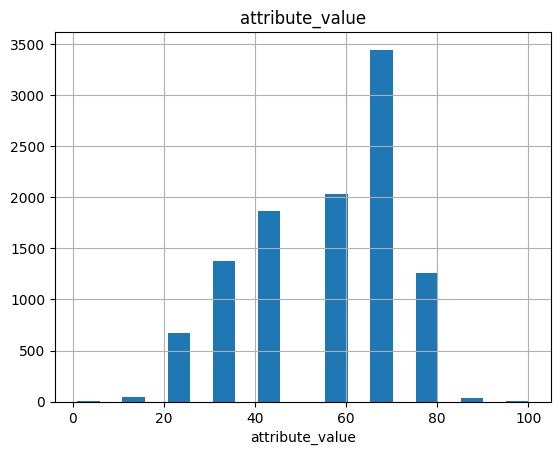

#################### QUANTILES ###############
count   10730.000
mean       55.271
std        16.048
min         1.000
5%         23.000
10%        34.000
20%        45.000
50%        56.000
60%        67.000
80%        67.000
90%        78.000
95%        78.000
99%        78.000
max       100.000
Name: attribute_value, dtype: float64



In [27]:
# applying the function:
for col in num_cols:
    num_summary(df, col , plot = True)

<a id = "7"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 4.3 Target Variable Analysis</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [28]:
# Target - Categorical Variables

In [29]:
df.drop(df[df["potential_label"]=="below_average"].index,inplace=True)

In [30]:
#checking:

df["potential_label"].value_counts()

potential_label
average        8497
highlighted    2097
Name: count, dtype: int64

In [31]:
# defining a function for label encoding:

def label_encoder(dataframe,cols):
    labelencoder = LabelEncoder()
    dataframe[cols] = labelencoder.fit_transform(dataframe[cols])
    return dataframe

In [32]:
label_encoder(df,"potential_label")
df.head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
0,4915,62935,177676,1361061,2,12818495,4322,56.000,0
1,4915,62935,177676,1361061,2,12818495,4323,56.000,0
2,4915,62935,177676,1361061,2,12818495,4324,67.000,0
3,4915,62935,177676,1361061,2,12818495,4325,56.000,0
4,4915,62935,177676,1361061,2,12818495,4326,45.000,0


In [33]:
# defining a function to check summary of the target and categorical variables:

def target_summary_with_cat(dataframe,target,categorical_col):
    for col in categorical_col:
        print(f"################ Target Mean by {col} #################", end ="\n\n")
        print(pd.DataFrame({f"{target}_Mean": dataframe.groupby(col)[target].mean()}), end = "\n\n\n")

In [34]:
# applying the function:

target_summary_with_cat(df, "potential_label", cat_cols)

################ Target Mean by potential_label #################

                 potential_label_Mean
potential_label                      
0                               0.000
1                               1.000


################ Target Mean by position_id #################

             potential_label_Mean
position_id                      
1                           0.179
2                           0.190
3                           0.071
4                           0.040
5                           0.208
6                           0.262
7                           0.138
8                           0.207
9                           0.440
10                          0.226


################ Target Mean by attribute_id #################

              potential_label_Mean
attribute_id                      
4322                         0.197
4323                         0.197
4324                         0.197
4325                         0.197
4326                         0.1

In [35]:
# Target - Numerical Variables

In [36]:
# defining a function to check summary of the target and numerical variables:

def target_summary_with_num(dataframe,target,numerical_col,plot=False):
    if plot:
        print(f"########### {target} Info - {numerical_col} Visualization ###########")
        sns.pairplot(data=dataframe, vars=numerical_col, hue=target, height=5)
        plt.show()
    for col in numerical_col:
        print(f"##################### {col} Describe ####################################")
        print(pd.DataFrame({col: dataframe[col].describe().T}), end = "\n\n\n")
        print(f"####################### {target} - {col} Mean #################################")
        print(dataframe.groupby(target).agg({col:"mean"}), end = "\n\n\n")

########### potential_label Info - ['task_response_id', 'analysis_id', 'attribute_value'] Visualization ###########


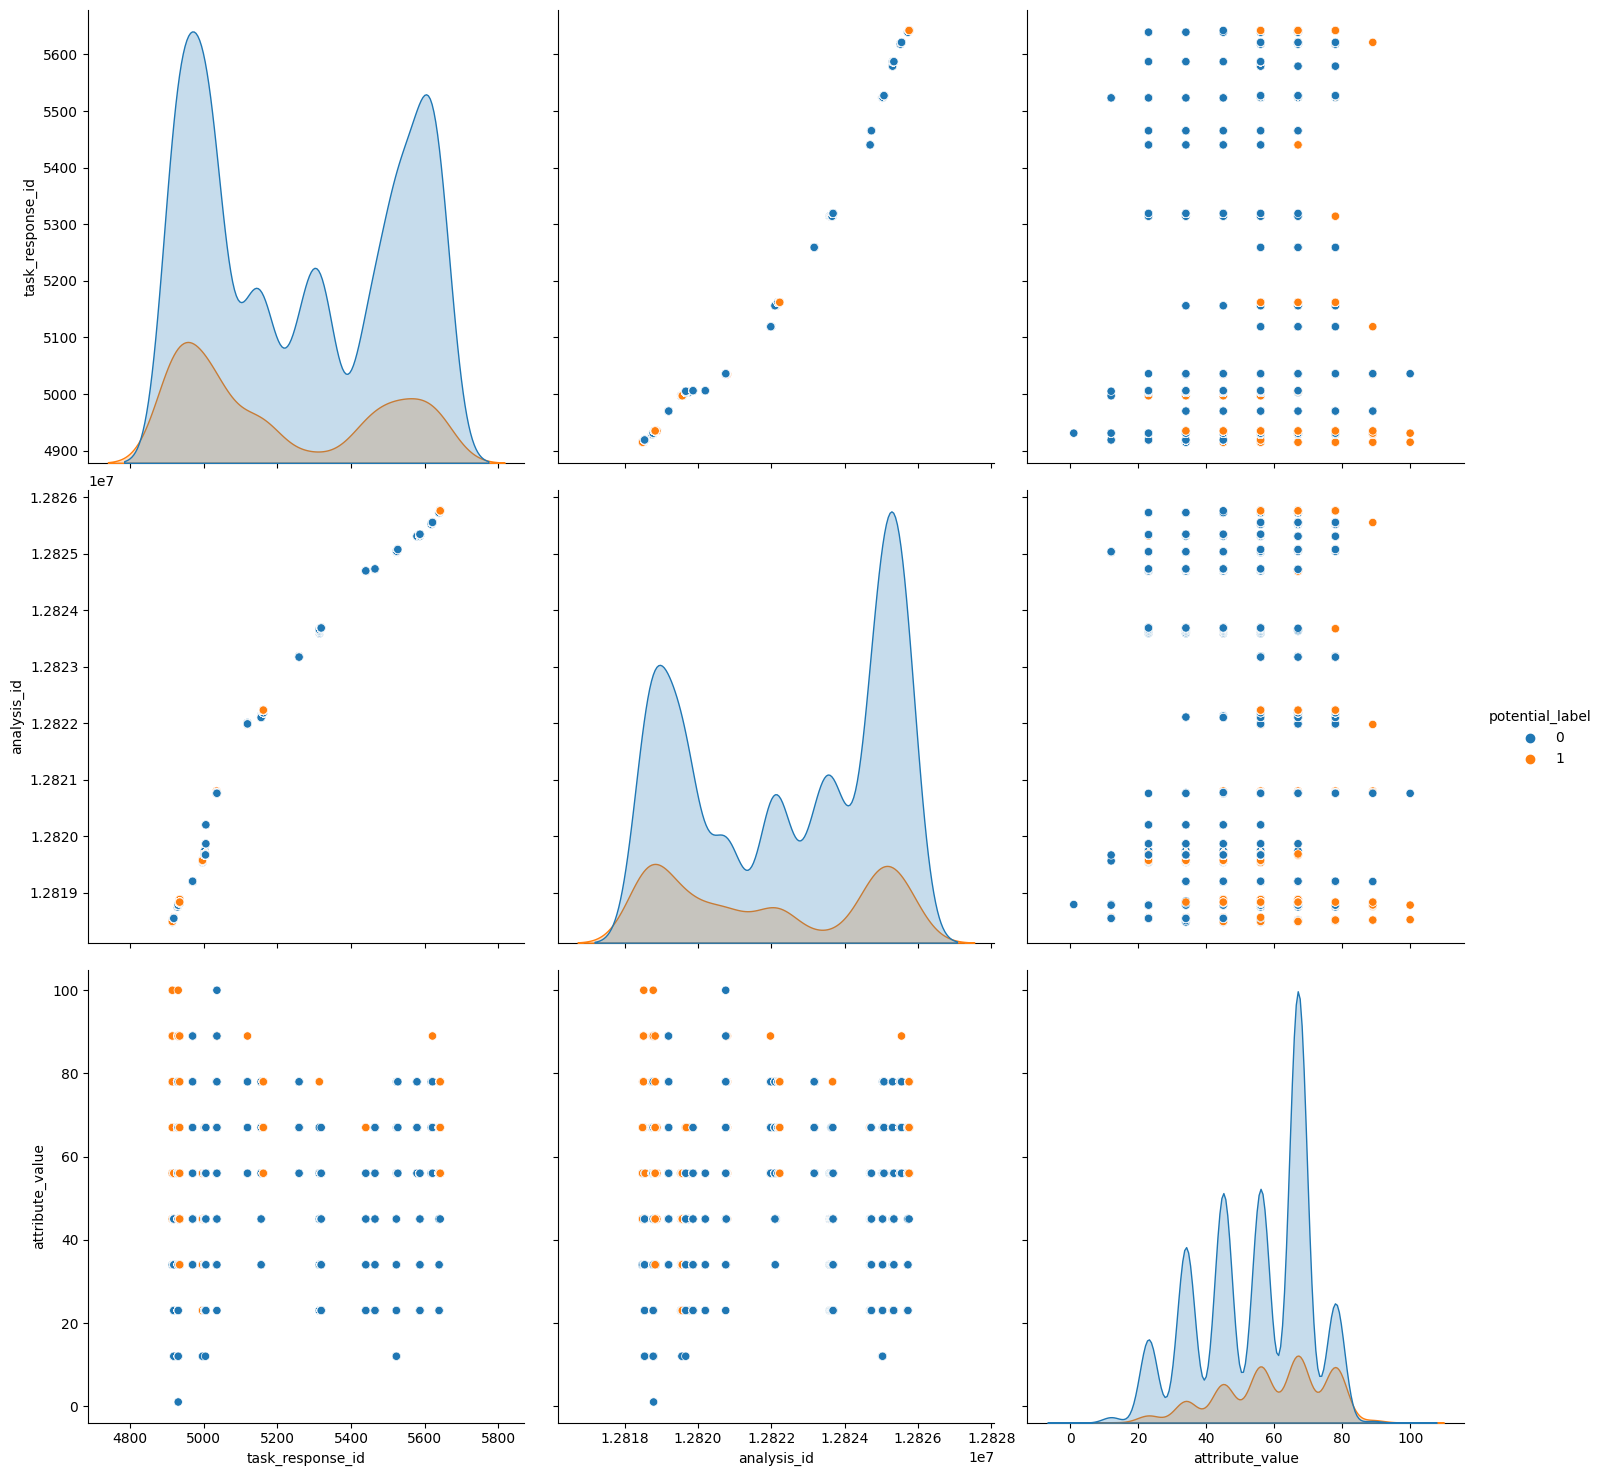

##################### task_response_id Describe ####################################
       task_response_id
count         10594.000
mean           5253.402
std             267.762
min            4915.000
25%            4997.000
50%            5162.000
75%            5524.000
max            5642.000


####################### potential_label - task_response_id Mean #################################
                 task_response_id
potential_label                  
0                        5266.087
1                        5202.006


##################### analysis_id Describe ####################################
       analysis_id
count    10594.000
mean  12822404.337
std       2672.550
min   12818481.000
25%   12819582.000
50%   12822233.000
75%   12825047.000
max   12825764.000


####################### potential_label - analysis_id Mean #################################
                 analysis_id
potential_label             
0               12822535.608
1               12821872.428

In [37]:
# applying the function:

target_summary_with_num(df,"potential_label",num_cols,plot=True)

<a id = "8"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 4.4 Outlier Analysis</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

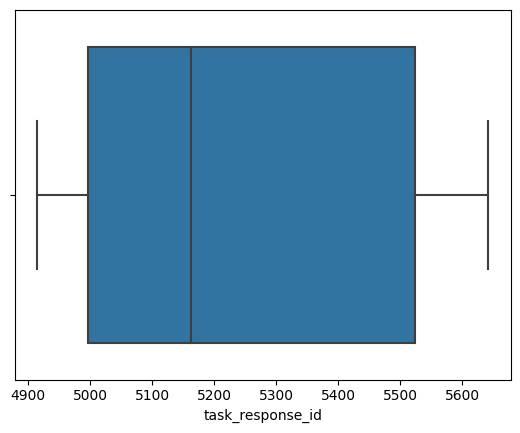

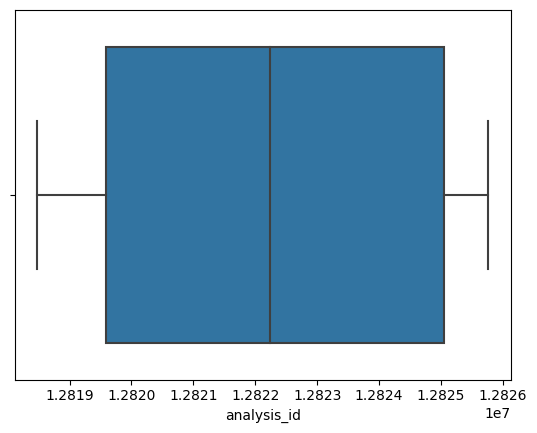

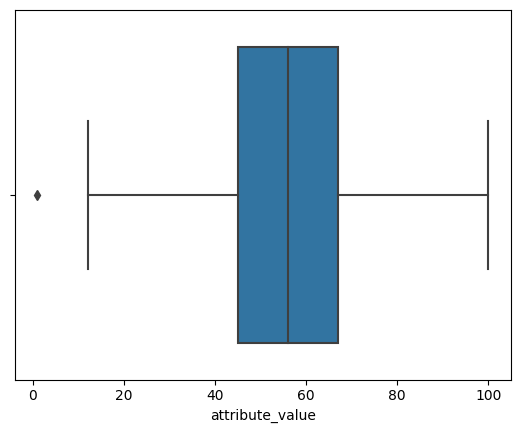

In [38]:
# outlier analysis using graphical techniques:

for col in num_cols:
    sns.boxplot(x= df[col])
    plt.show()

In [39]:
# calculating ouitlier thresholds:

def outlier_thresholds(dataframe,col_name,q1=0.01,q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5*interquantile_range
    low_limit = quartile1 - 1.5*interquantile_range
    return low_limit, up_limit

In [40]:
# checking outlier in the dataframe:

def check_outlier(dataframe, col_name):
    if pd.api.types.is_numeric_dtype(dataframe[col_name]):
        low, up = outlier_thresholds(dataframe, col_name)
        return (dataframe[col_name] > up) | (dataframe[col_name] < low)
    else:
        return pd.Series(False, index=dataframe.index)

In [41]:
#checking results:
check_outlier(df, num_cols).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [42]:
#defining a function to check columns outliers:

def check_all_columns_outliers(dataframe,num_cols):
    results = {}
    for col in num_cols:
        results[col] = check_outlier(dataframe, col).any() if pd.api.types.is_numeric_dtype(dataframe[col]) else False
    return results

In [43]:
#checking results:

check_all_columns_outliers(df,num_cols)

{'task_response_id': False, 'analysis_id': False, 'attribute_value': False}

In [44]:
# listing columns based on outlier information:

def show_column_names_with_outliers_info(dataframe,col_list):
    print("################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################")
    for col in col_list:
        low, up = outlier_thresholds(dataframe,col)
        print(f"{col} : low: {low}, up: {up}",end ="\n")
    print(end="\n\n")
    no_outliers = []
    have_outliers = []
    for col,value in check_all_columns_outliers(dataframe,col_list).items():
        if value:
            have_outliers.append(col)
        else:
            no_outliers.append(col)
    print("################# Numeric Columns Have Outliers  #####################")
    print(have_outliers)
    print(f"count_columns: {len(have_outliers)}", end="\n\n")
    print("################# Numeric Columns Have NOT Outliers #####################")
    print(no_outliers)
    print(f"count_columns: {len(no_outliers)}", end="\n\n")
    return have_outliers,no_outliers

In [45]:
# applying the function:

have_outliers,no_outliers = show_column_names_with_outliers_info(df,num_cols)

################# Numeric Columns Outlier Thresholds: Low & Up Limit  #####################
task_response_id : low: 3824.5, up: 6732.5
analysis_id : low: 12807588.5, up: 12836664.5
attribute_value : low: -59.5, up: 160.5


################# Numeric Columns Have Outliers  #####################
[]
count_columns: 0

################# Numeric Columns Have NOT Outliers #####################
['task_response_id', 'analysis_id', 'attribute_value']
count_columns: 3



<a id = "9"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 4.5 Correlation Analysis </b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [46]:
# calculating correlation :

corr = df[num_cols].corr()
corr

,task_response_id,analysis_id,attribute_value
task_response_id,1.000,0.983,0.078
analysis_id,0.983,1.000,0.098
attribute_value,0.078,0.098,1.000


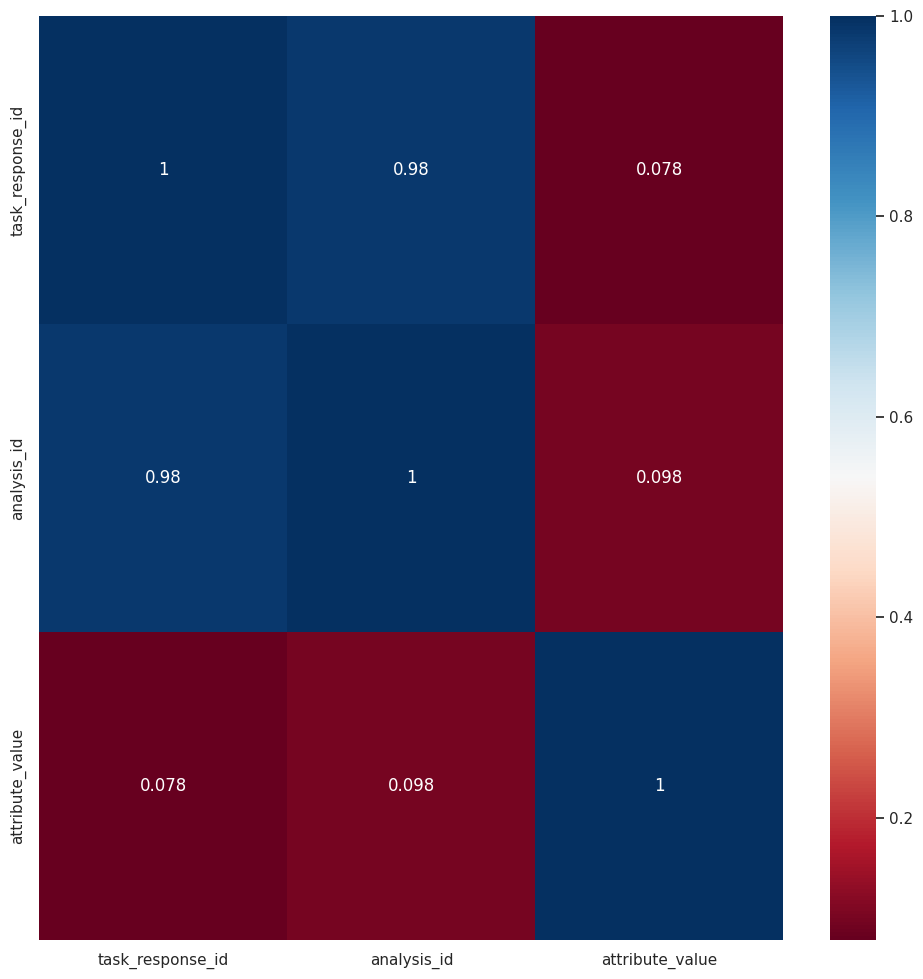

In [47]:
# correlation graph:

sns.set(rc = {"figure.figsize":(12,12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

In [48]:
# high correlation columns 
# list of items to be dropped:

def high_correlated_cols(dataframe,plot= False, corr_th = 0.90):
    import numpy as np
    corr = dataframe.corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any (upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc = {"figure.figsize":(15,15)})
        sns.heatmap(corr_matrix,cmap = "RdBu")
        plt.show()
    return drop_list

In [49]:
# applying the function:

high_correlated_cols(df[num_cols],plot=False)

['analysis_id']

<a id = "10"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>5. Data Preprocessing</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

<a id = "11"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 5.1 Missing Values </b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [50]:
# defining a function for missing values:

def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")
    if na_name:
        return na_columns

In [51]:
# checking:

missing_values_table(df)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []


<a id = "12"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 5.2 Outlier Suppression</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [52]:
# outlier suppression:

def replace_with_thresholds(dataframe,variable):
    low, up = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low),variable] = low
    dataframe.loc[(dataframe[variable] > up),variable] = up

In [53]:
df[have_outliers].dtypes

Series([], dtype: object)

In [54]:
#applying the function:

for col in have_outliers:
    if col not in ["potential_label"]:
        replace_with_thresholds(df, col)

<a id = "13"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>6. Feature Engineering</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

<a id = "14"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 6.1 Feature Extraction</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [55]:
df[df["position_id"]==1].head()

,task_response_id,match_id,evaluator_id,player_id,position_id,analysis_id,attribute_id,attribute_value,potential_label
238,4915,62935,177676,1369060,1,12818481,4322,45.000,0
239,4915,62935,177676,1369060,1,12818481,4323,34.000,0
240,4915,62935,177676,1369060,1,12818481,4324,45.000,0
241,4915,62935,177676,1369060,1,12818481,4325,56.000,0
242,4915,62935,177676,1369060,1,12818481,4326,56.000,0


In [56]:
df.drop(df[df["position_id"]==1].index,inplace=True)

In [57]:
#checking:

df["position_id"].value_counts()

position_id
2     1972
6     1428
10    1054
7      986
8      986
3      952
9      850
4      850
5      816
Name: count, dtype: int64

In [58]:
# Creating a pivot table with each row representing a player:

df_pivot = df.pivot_table(values=["attribute_value"],index=["player_id","position_id","potential_label"],columns=["attribute_id"])

In [59]:
#checking:

df_pivot.head()

attribute_value                                                                                                                                                                                                                                       
attribute_id                                     4322   4323   4324   4325   4326   4327   4328   4329   4330   4332   4333   4335   4338   4339   4340   4341   4342   4343   4344   4345   4348   4349   4350   4351   4352   4353   4354   4355   4356   4357   4407   4408   4423   4426
player_id position_id potential_label                                                                                                                                                                                                                                                       
1355710   7           0                        50.500 50.500 34.000 50.500 45.000 45.000 45.000 45.000 50.500 56.000 39.500 34.000 39.500 39.500 45.000 45.000 50.500 28.500 23.000 39.500 28.500 28.500 45.000 50.500 56.000 34.000 39.500 50.500 34.000 34.000 56.000 34.000 34.000 56.000
1356362   9           0                        67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 56.000 67.000 67.000 56.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 67.000 67.000 56.000 78.000
1356375   3           0                        67.000 67.000 67.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 78.000 56.000 67.000 67.000 67.000 67.000 67.000 56.000 56.000 67.000 67.000 56.000 56.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 67.000 67.000 56.000 78.000
          4           0                        67.000 78.000 67.000 67.000 67.000 78.000 78.000 78.000 56.000 67.000 67.000 67.000 78.000 78.000 56.000 67.000 67.000 45.000 45.000 56.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 56.000 67.000 56.000 67.000 45.000 56.000
1356411   9           0                        67.000 67.000 78.000 78.000 67.000 67.000 67.000 67.000 89.000 78.000 67.000 67.000 67.000 56.000 56.000 67.000 78.000 56.000 56.000 67.000 56.000 67.000 56.000 67.000 67.000 56.000 67.000 67.000 56.000 67.000 89.000 56.000 67.000 78.000

In [60]:
df_pivot = df_pivot.reset_index() #reset index

In [61]:
df_pivot.head()  #display first 5 rows

player_id position_id potential_label attribute_value                                                                                                                                                                                                                                       
attribute_id                                                  4322   4323   4324   4325   4326   4327   4328   4329   4330   4332   4333   4335   4338   4339   4340   4341   4342   4343   4344   4345   4348   4349   4350   4351   4352   4353   4354   4355   4356   4357   4407   4408   4423   4426
0              1355710           7               0          50.500 50.500 34.000 50.500 45.000 45.000 45.000 45.000 50.500 56.000 39.500 34.000 39.500 39.500 45.000 45.000 50.500 28.500 23.000 39.500 28.500 28.500 45.000 50.500 56.000 34.000 39.500 50.500 34.000 34.000 56.000 34.000 34.000 56.000
1              1356362           9               0          67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 67.000 56.000 67.000 67.000 56.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 67.000 67.000 56.000 78.000
2              1356375           3               0          67.000 67.000 67.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 78.000 56.000 67.000 67.000 67.000 67.000 67.000 56.000 56.000 67.000 67.000 56.000 56.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 67.000 67.000 56.000 78.000
3              1356375           4               0          67.000 78.000 67.000 67.000 67.000 78.000 78.000 78.000 56.000 67.000 67.000 67.000 78.000 78.000 56.000 67.000 67.000 45.000 45.000 56.000 67.000 67.000 67.000 67.000 78.000 67.000 67.000 67.000 56.000 67.000 56.000 67.000 45.000 56.000
4              1356411           9               0          67.000 67.000 78.000 78.000 67.000 67.000 67.000 67.000 89.000 78.000 67.000 67.000 67.000 56.000 56.000 67.000 78.000 56.000 56.000 67.000 56.000 67.000 56.000 67.000 67.000 56.000 67.000 67.000 56.000 67.000 89.000 56.000 67.000 78.000

In [62]:
# Let’s assign the indices as variables and convert the names of the ‘attribute_id’ columns to strings:

In [63]:
# converting multi-level columns to strings:

df_pivot.columns = [str(col) if isinstance(col, int) else col for col in df_pivot.columns.get_level_values(1)]
df_pivot.columns = df_pivot.columns.str.replace('attribute_value, ', '')

In [64]:
# correcting the names (leave the first three columns as they are):

new_columns = ['player_id', 'position_id', 'potential_label'] + [str(col) for col in df_pivot.columns[3:]]
df_pivot.columns = new_columns

In [65]:
#checking:

df_pivot.head() 

,player_id,position_id,potential_label,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
0,1355710,7,0,50.500,50.500,34.000,50.500,45.000,45.000,45.000,45.000,50.500,56.000,39.500,34.000,39.500,39.500,45.000,45.000,50.500,28.500,23.000,39.500,28.500,28.500,45.000,50.500,56.000,34.000,39.500,50.500,34.000,34.000,56.000,34.000,34.000,56.000
1,1356362,9,0,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
2,1356375,3,0,67.000,67.000,67.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,78.000,56.000,67.000,67.000,67.000,67.000,67.000,56.000,56.000,67.000,67.000,56.000,56.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,67.000,67.000,56.000,78.000
3,1356375,4,0,67.000,78.000,67.000,67.000,67.000,78.000,78.000,78.000,56.000,67.000,67.000,67.000,78.000,78.000,56.000,67.000,67.000,45.000,45.000,56.000,67.000,67.000,67.000,67.000,78.000,67.000,67.000,67.000,56.000,67.000,56.000,67.000,45.000,56.000
4,1356411,9,0,67.000,67.000,78.000,78.000,67.000,67.000,67.000,67.000,89.000,78.000,67.000,67.000,67.000,56.000,56.000,67.000,78.000,56.000,56.000,67.000,56.000,67.000,56.000,67.000,67.000,56.000,67.000,67.000,56.000,67.000,89.000,56.000,67.000,78.000


In [66]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271 entries, 0 to 270
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   player_id        271 non-null    int64  
 1   position_id      271 non-null    int64  
 2   potential_label  271 non-null    int64  
 3   4322             271 non-null    float64
 4   4323             271 non-null    float64
 5   4324             271 non-null    float64
 6   4325             271 non-null    float64
 7   4326             271 non-null    float64
 8   4327             271 non-null    float64
 9   4328             271 non-null    float64
 10  4329             271 non-null    float64
 11  4330             271 non-null    float64
 12  4332             271 non-null    float64
 13  4333             271 non-null    float64
 14  4335             271 non-null    float64
 15  4338             271 non-null    float64
 16  4339             271 non-null    float64
 17  4340            

<a id = "15"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b> 6.2 Feature Scaling</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [67]:
# for numerical columns:

In [68]:
# creating a numeric columns for new pivot df:

num_cols_pivot = ["4322", "4323", "4324", "4325", "4326", "4327", "4328", "4329", "4330", "4332", "4333", "4335", "4338", "4339", "4340", "4341", "4342", "4343", "4344", "4345", "4348", "4349", "4350", "4351", "4352", "4353", "4354", "4355", "4356", "4357", "4407", "4408", "4423", "4426"]

In [69]:
# standardization of numerical variables:

ss = StandardScaler()
df_pivot[num_cols_pivot] = ss.fit_transform(df_pivot[num_cols_pivot])

<a id = "16"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>7. Modeling</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

<a id = "17"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>7.1 Modeling </b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [70]:
# split the model:

y = df_pivot["potential_label"] # dependent variable
X = df_pivot.drop(["potential_label","player_id"], axis=1) # independent variables

In [71]:
# creating a list with models:
models = [('Logistic Regression', LogisticRegression()),('Random Forest', RandomForestClassifier()),
          ('Support Vector Machine', SVC()),('KNeighborsClassifier', KNeighborsClassifier())]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24) # split the data

In [73]:
# fitting models:

for name, classifier in models:
    classifier.fit(X_train, y_train)

<a id = "18"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>7.2. Model Performance Evaluation</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [74]:
# evaluating results:

for model_name, classifier in models:
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_pred,y_test)
    precision = precision_score(y_pred,y_test)
    f1 = f1_score(y_pred,y_test)
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Recall: {recall:.3f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1: {f1:.2f}",end="\n\n")

Logistic Regression:
Accuracy: 0.89
Recall: 0.800
Precision: 0.44
F1: 0.57

Random Forest:
Accuracy: 0.89
Recall: 1.000
Precision: 0.33
F1: 0.50

Support Vector Machine:
Accuracy: 0.85
Recall: 1.000
Precision: 0.11
F1: 0.20

KNeighborsClassifier:
Accuracy: 0.87
Recall: 1.000
Precision: 0.22
F1: 0.36



<a id = "19"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>7.3 Cross Validation</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [75]:
# evaluating 5-fold cross validation results:

for model_name, classifier in models:
    scoring = {'accuracy': 'accuracy','recall': 'recall','precision': 'precision','f1': 'f1','roc_auc': 'roc_auc'}
    cv_results = cross_validate(classifier,X,y,cv=5,scoring=scoring)
    print(f"{model_name}:",end="\n")
    print("Accuracy: ", cv_results['test_accuracy'].mean())
    print("Recall: ", cv_results['test_recall'].mean())
    print("Precision: ", cv_results['test_precision'].mean())
    print("F1: ", cv_results['test_f1'].mean())
    print("Auc: ", cv_results['test_roc_auc'].mean(),end="\n\n")

Logistic Regression:
Accuracy:  0.8451178451178452
Recall:  0.4818181818181818
Precision:  0.6825974025974025
F1:  0.5545454545454545
Auc:  0.8332276250880903

Random Forest:
Accuracy:  0.8892255892255893
Recall:  0.48030303030303034
Precision:  0.96
F1:  0.6345906432748538
Auc:  0.9096899224806201

Support Vector Machine:
Accuracy:  0.8008080808080809
Recall:  0.03636363636363636
Precision:  0.4
F1:  0.06666666666666668
Auc:  0.8384073291050035

KNeighborsClassifier:
Accuracy:  0.8375084175084175
Recall:  0.2636363636363636
Precision:  0.8547619047619047
F1:  0.3825062656641604
Auc:  0.7462825933756166



<a id = "20"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>8. Hyperparameter Tuning</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

<a id = "21"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>8.1 Determining Parameters</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [76]:
# default parameters of the models:

for model_name, classifier in models:
    print(f"####################### {model_name} #######################")
    print(f"parameters: {classifier.get_params()}",end="\n\n")

####################### Logistic Regression #######################
parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

####################### Random Forest #######################
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

####################### Support Vector Machine #######################
parameters: {'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'dec

In [77]:
# determined parameters of the models for hiperparameter tuning:

model_params = [
    ('Logistic Regression', LogisticRegression(), {
        'C': [0.01, 0.1, 1, 10],
        'solver': [ 'lbfgs', 'liblinear'],  
        'max_iter': [500, 1000, 1500],  
        'tol': [1e-4, 1e-3, 1e-2]  
    }),
    ('Random Forest', RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }),    
    ('Support Vector Machine', SVC(), {
        'C': [0.1, 1, 5],
        'degree': [2, 3, 4],
        'gamma': ['scale']
    }),
    ('KNeighborsClassifier', KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'p': [1, 2]})
]

<a id = "22"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>8.2 Best Parameters & Best Scores</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [78]:
# hiperparameter tuning:
# best parameters and best scores on the models:

best_model_name = None
best_model = None
best_score = float('-inf')
best_params = None

for model_name, classifier, params in model_params:
    classifier_grid = GridSearchCV(classifier, params, cv=5, n_jobs = -1, verbose = True).fit(X, y)
    
    print(f"Model: {model_name}")
    print("Best Parameters:", classifier_grid.best_params_)
    print("Best Score:", classifier_grid.best_score_,end="\n\n")
    print("######################",end="\n\n")
    
    if  classifier_grid.best_score_ > best_score:
        best_model_name = model_name
        best_model = classifier
        best_score = classifier_grid.best_score_
        best_params = classifier_grid.best_params_
        
      
print("######################### Best Model & Hyperparameters #########################")
print(f"Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Model: Logistic Regression
Best Parameters: {'C': 1, 'max_iter': 500, 'solver': 'liblinear', 'tol': 0.01}
Best Score: 0.8487542087542088

######################

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Model: Random Forest
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.9002693602693604

######################

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Model: Support Vector Machine
Best Parameters: {'C': 5, 'degree': 2, 'gamma': 'scale'}
Best Score: 0.8708417508417508

######################

Fitting 5 folds for each of 64 candidates, totalling 320 fits
Model: KNeighborsClassifier
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Best Score: 0.8411447811447811

######################

######################### Best Model & Hyperparameters ###################

In [79]:
best_model

RandomForestClassifier()

In [80]:
# defining a function to find parameters for the best model:

def find_best_model_params(model_params,best_model):
    for model_name, classifier, params in model_params:
        if best_model == classifier:
            best_model_params = params
    return best_model_params

In [81]:
#appyling the function:

best_model_params = find_best_model_params(model_params,best_model)

In [82]:
best_model_params

{'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [83]:
classifier_best_grid = GridSearchCV(best_model, best_model_params, cv=5, n_jobs = -1, verbose = True).fit(X, y)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [84]:
classifier_best_grid

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=True)

<a id = "23"></a>
<div style="background-color:#b2fab4; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:24px; font-family:Helvetica, sans-serif; color:#000000;"><b>9. Final Model</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

<a id = "24"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>9.1 Modeling</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [85]:
# fitting final model to use best parameters:

model_final = RandomForestClassifier(**classifier_best_grid.best_params_).fit(X, y)

<a id = "25"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>9.2 Cross Validation</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [86]:
# evaluating 5-fold cross validation results:

scoring = {'accuracy': 'accuracy','recall': 'recall','precision': 'precision','f1': 'f1','roc_auc': 'roc_auc'}
cv_results = cross_validate(model_final,X,y,cv=5,scoring=scoring)
print(f"Best Model: {best_model_name} ",end="\n")
print("Accuracy: ", cv_results['test_accuracy'].mean())
print("Recall: ", cv_results['test_recall'].mean())
print("Precision: ", cv_results['test_precision'].mean())
print("F1: ", cv_results['test_f1'].mean())
print("Auc: ", cv_results['test_roc_auc'].mean(),end="\n\n")

Best Model: Random Forest 
Accuracy:  0.8892929292929292
Recall:  0.5333333333333333
Precision:  0.8933333333333333
F1:  0.6613042186571599
Auc:  0.8971811134601833



<a id = "26"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>9.3 Feature Importance</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [87]:
# creating function to visualize:

def plot_importance(model, features, start = 0 ,num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    print(feature_imp.sort_values("Value",ascending=False)[start:num])
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[start:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

    Value      Feature
4   0.206         4325
5   0.068         4326
16  0.058         4341
20  0.051         4345
19  0.049         4344
26  0.044         4353
23  0.036         4350
24  0.030         4351
0   0.024  position_id
10  0.023         4332
13  0.022         4338
33  0.022         4423
22  0.022         4349
18  0.021         4343
17  0.021         4342
7   0.021         4328
31  0.020         4407
30  0.019         4357
14  0.019         4339
12  0.018         4335
32  0.017         4408
25  0.017         4352
1   0.016         4322
8   0.015         4329
3   0.015         4324
28  0.014         4355
6   0.014         4327
15  0.014         4340
27  0.014         4354
21  0.014         4348
11  0.013         4333
34  0.013         4426
29  0.010         4356
9   0.010         4330
2   0.009         4323


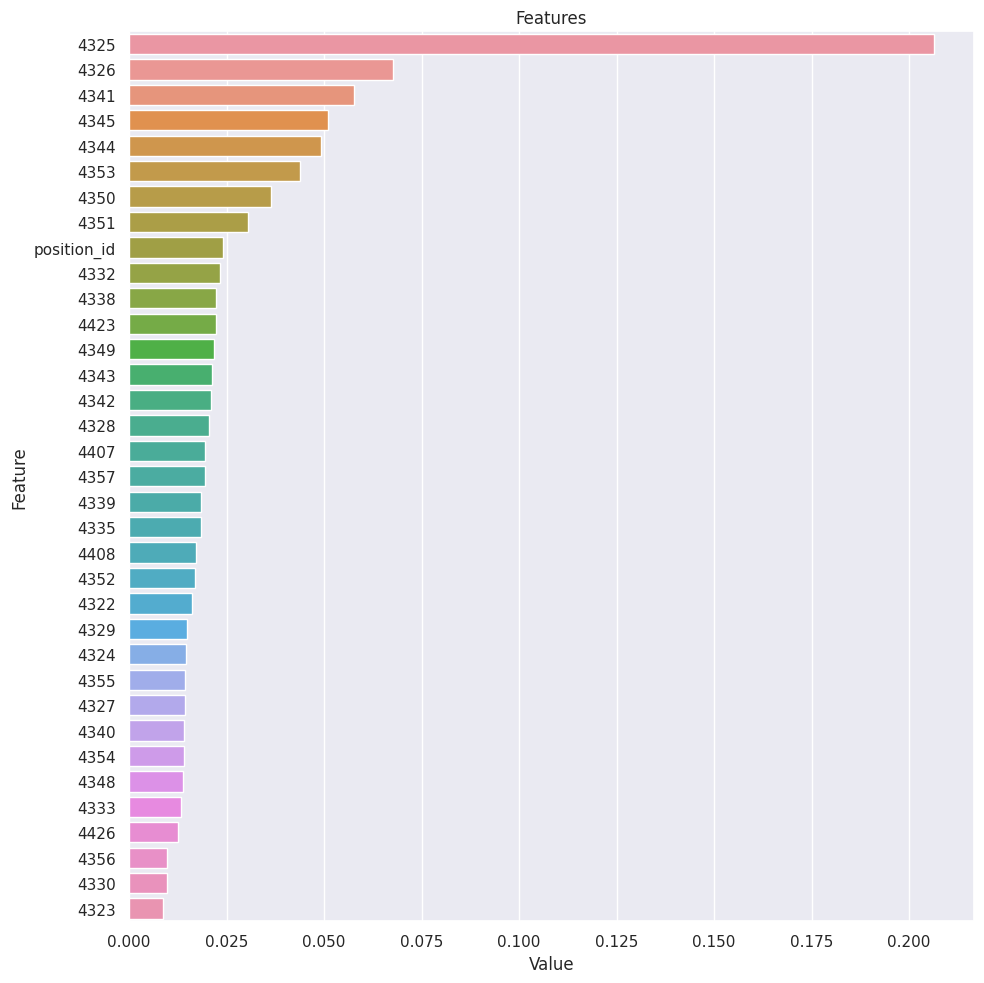

In [88]:
# appyling the function:

plot_importance(model_final, X)

<a id = "27"></a>
<div style="background-color:#f5f5dc; padding: 20px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #0A2342">
    <h1 style="font-size:20px; font-family:Helvetica, sans-serif; color:#000000;"><b>9.4 Prediction</b></h1>
    <p style="font-size:20px; font-family:Helvetica, sans-serif; line-height: 1.5em; text-indent: 20px; color:#000000;">
</div>

In [89]:
# selecting a random value:

random = X.sample(1,random_state = 24)

In [90]:
random

,position_id,4322,4323,4324,4325,4326,4327,4328,4329,4330,4332,4333,4335,4338,4339,4340,4341,4342,4343,4344,4345,4348,4349,4350,4351,4352,4353,4354,4355,4356,4357,4407,4408,4423,4426
229,6,-1.681,-0.933,-0.710,-1.559,-1.511,-1.554,-1.662,-0.792,-1.621,-1.750,-1.560,0.319,-1.478,-1.379,-1.269,-1.435,-0.909,-0.739,-0.554,-1.354,-1.001,-0.699,-1.464,-1.588,-1.535,-1.282,-0.820,-1.621,-1.235,-0.757,-0.143,-0.050,-1.635,-1.547


In [91]:
# Make predictions:

prediction = model_final.predict(random)

In [92]:
prediction

array([0])